In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
result = requests.get("https://www.airlinequality.com/airline-reviews/british-airways")

In [3]:
type(result)

requests.models.Response

In [8]:
#result.text

In [5]:
soup = BeautifulSoup(result.text,"lxml")

In [9]:
#soup

In [7]:
soup.select('title')[0].getText()

'British Airways Customer Reviews - SKYTRAX'

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
for i in range(1, pages+1):
    print(f'Scraping pages {i} of 10')
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    
    #parsing the content
    content = response.content
    parsed_content = BeautifulSoup(content,'html.parser')
    #finding all divs and fetching the strings
    for divs in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(divs.get_text())
        
    print(f"   ---> {len(reviews)} total reviews")
    
    

Scraping pages 1 of 10
   ---> 100 total reviews
Scraping pages 2 of 10
   ---> 200 total reviews
Scraping pages 3 of 10
   ---> 300 total reviews
Scraping pages 4 of 10
   ---> 400 total reviews
Scraping pages 5 of 10
   ---> 500 total reviews
Scraping pages 6 of 10
   ---> 600 total reviews
Scraping pages 7 of 10
   ---> 700 total reviews
Scraping pages 8 of 10
   ---> 800 total reviews
Scraping pages 9 of 10
   ---> 900 total reviews
Scraping pages 10 of 10
   ---> 1000 total reviews


In [9]:
#reviews

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame()

In [12]:
df["Reviews"] = reviews

In [13]:
df.head()

,Reviews
0,✅ Trip Verified | I was pleasantly surprised ...
1,"✅ Trip Verified | British Airways is late, th..."
2,✅ Trip Verified | Flew from Amman to London on...
3,✅ Trip Verified | This is the worst experience...
4,✅ Trip Verified | Flying LHR T5 to CPT Novemb...


In [14]:
df.to_csv("Reviews.csv")

## Now we have our data set , lets work on it now

In [98]:
df= pd.read_csv("Reviews.csv")

In [99]:
df.head()

,Unnamed: 0,Reviews
0,0,✅ Trip Verified | I was pleasantly surprised ...
1,1,"✅ Trip Verified | British Airways is late, th..."
2,2,✅ Trip Verified | Flew from Amman to London on...
3,3,✅ Trip Verified | This is the worst experience...
4,4,✅ Trip Verified | Flying LHR T5 to CPT Novemb...


In [100]:
df.columns

Index(['Unnamed: 0', 'Reviews'], dtype='object')

In [101]:
df=df.drop("Unnamed: 0",axis=1)

In [102]:
df.head()

,Reviews
0,✅ Trip Verified | I was pleasantly surprised ...
1,"✅ Trip Verified | British Airways is late, th..."
2,✅ Trip Verified | Flew from Amman to London on...
3,✅ Trip Verified | This is the worst experience...
4,✅ Trip Verified | Flying LHR T5 to CPT Novemb...


In [103]:
df.isnull().sum()

Reviews    0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [10]:
#df['Reviews'].str.split('|')[993]

### Removing this row as it is not showing any information about verified or not

In [106]:
df=df.drop([993],axis=0) 

In [107]:
df=df.drop([994],axis=0)

In [108]:
df=df.reset_index()

In [109]:
df = df.drop('index',axis=1)

In [110]:
df.tail(10)

,Reviews
988,✅ Trip Verified | Worst business class I flew...
989,✅ Trip Verified | Beijing to London. Service ...
990,✅ Trip Verified | London to Beijing. Left fro...
991,✅ Trip Verified | Bangkok to London. The wors...
992,✅ Trip Verified | Food on this 4+ hours flight...
993,✅ Trip Verified | London to Belfast. Another r...
994,✅ Trip Verified | Very full flight on G-BNLP/B...
995,✅ Trip Verified | Warsaw to London. WAW is not...
996,✅ Trip Verified | I booked my flight with Cat...
997,✅ Trip Verified | Flew British Airways from Li...


In [111]:
df.head(10)

,Reviews
0,✅ Trip Verified | I was pleasantly surprised ...
1,"✅ Trip Verified | British Airways is late, th..."
2,✅ Trip Verified | Flew from Amman to London on...
3,✅ Trip Verified | This is the worst experience...
4,✅ Trip Verified | Flying LHR T5 to CPT Novemb...
5,Not Verified | Worst experience ever. Outbound...
6,✅ Trip Verified | Check in was a shambles at ...
7,✅ Trip Verified | Beyond disgusted with the fa...
8,✅ Trip Verified | On July 19th 2022 I had subm...
9,✅ Trip Verified | I booked the flight on Oct ...


In [114]:
for i in range(len(df)):
    df['Reviews'][i] = df['Reviews'].str.split('|')[i][1]

In [115]:
df.head()

,Reviews
0,I was pleasantly surprised that the airline ...
1,"British Airways is late, their website is at..."
2,Flew from Amman to London on Nov. 14 2022. No...
3,This is the worst experience I have ever had ...
4,Flying LHR T5 to CPT November 2022: BA app ...


In [116]:
df.to_csv("Reviews.csv")

# TRYING WITH NLTK

In [20]:
#conda install nltk

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/akhil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,Reviews
0,I was pleasantly surprised that the airline ...
1,"British Airways is late, their website is at..."
2,Flew from Amman to London on Nov. 14 2022. No...
3,This is the worst experience I have ever had ...
4,Flying LHR T5 to CPT November 2022: BA app ...


In [5]:
df.shape

(998, 1)

## basic nltk stuff

In [6]:
ex = df['Reviews'][0]
ex

'  I was pleasantly surprised that the airline could maintain a steady schedule with little delay considering the time of the year and the weather. The flight from Montreal was my return flight to Scotland, but I originally booked to fly to and from Toronto, but the airline helped me cancel and I rebooked for a cheaper flight. The inflight service was pretty decent andthey do offer a blanket and pillow. As well they walk through the cabin offering drinks and handing out a small snack prior to the leading meal service. While the food was typical air plane food. I thoroughly enjoyed my flight and had no issues at all with my flights.'

In [7]:
tokens = nltk.word_tokenize(ex)
tokens[:10]

['I',
 'was',
 'pleasantly',
 'surprised',
 'that',
 'the',
 'airline',
 'could',
 'maintain',
 'a']

In [15]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package words to /home/akhil/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [16]:
tagged = nltk.pos_tag(tokens)

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  was/VBD
  pleasantly/RB
  surprised/VBN
  that/IN
  the/DT
  airline/NN
  could/MD
  maintain/VB
  a/DT
  steady/JJ
  schedule/NN
  with/IN
  little/JJ
  delay/NN
  considering/VBG
  the/DT
  time/NN
  of/IN
  the/DT
  year/NN
  and/CC
  the/DT
  weather/NN
  ./.
  The/DT
  flight/NN
  from/IN
  (PERSON Montreal/NNP)
  was/VBD
  my/PRP$
  return/NN
  flight/NN
  to/TO
  (GPE Scotland/NNP)
  ,/,
  but/CC
  I/PRP
  originally/RB
  booked/VBD
  to/TO
  fly/VB
  to/TO
  and/CC
  from/IN
  (GPE Toronto/NNP)
  ,/,
  but/CC
  the/DT
  airline/NN
  helped/VBD
  me/PRP
  cancel/NN
  and/CC
  I/PRP
  rebooked/VBD
  for/IN
  a/DT
  cheaper/JJR
  flight/NN
  ./.
  The/DT
  inflight/JJ
  service/NN
  was/VBD
  pretty/RB
  decent/JJ
  andthey/NN
  do/VBP
  offer/VB
  a/DT
  blanket/NN
  and/CC
  pillow/NN
  ./.
  As/IN
  well/RB
  they/PRP
  walk/VBP
  through/IN
  the/DT
  cabin/JJ
  offering/NN
  drinks/NNS
  and/CC
  handing/VBG
  out/RP
  a/DT
  small/JJ
  snack/NN
  prior/RB
  to/T

# VADER Sentiment Score

### Using the NLTK's Sentiment Intensity Analyser to  get the neg/neutral/pos scores of the text.


- Uses a Bag of words approach
    1. Stop words are removed
    2. Each of is scored and combined to a total score

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/akhil/nltk_data...


In [20]:
sia

In [24]:
sia.polarity_scores(ex)

{'neg': 0.057, 'neu': 0.814, 'pos': 0.129, 'compound': 0.8603}

### Running the polarity score on the entire data set

In [26]:
res = {}
for i, rows in tqdm(df.iterrows(), total = len(df)):
    text = rows['Reviews']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/998 [00:00<?, ?it/s]

In [30]:
vaders = pd.DataFrame(res).T

In [31]:
vaders.head()

,neg,neu,pos,compound
0,0.057,0.814,0.129,0.8603
1,0.000,1.000,0.000,0.0000
2,0.059,0.842,0.099,0.7420
3,0.116,0.855,0.030,-0.9462
4,0.082,0.861,0.057,-0.7687


In [32]:
vaders = vaders.reset_index().rename(columns = {'index':'Id'})

In [33]:
vaders.head()

,Id,neg,neu,pos,compound
0,0,0.057,0.814,0.129,0.8603
1,1,0.000,1.000,0.000,0.0000
2,2,0.059,0.842,0.099,0.7420
3,3,0.116,0.855,0.030,-0.9462
4,4,0.082,0.861,0.057,-0.7687


In [35]:
vaders.shape

(998, 5)

In [36]:
df.shape

(998, 1)

In [37]:
df=df.reset_index().rename(columns={'index':'Id'})

In [38]:
df.head()

,Id,Reviews
0,0,I was pleasantly surprised that the airline ...
1,1,"British Airways is late, their website is at..."
2,2,Flew from Amman to London on Nov. 14 2022. No...
3,3,This is the worst experience I have ever had ...
4,4,Flying LHR T5 to CPT November 2022: BA app ...


In [39]:
vaders = vaders.merge(df, how = 'left')

In [40]:
vaders.head()

,Id,neg,neu,pos,compound,Reviews
0,0,0.057,0.814,0.129,0.8603,I was pleasantly surprised that the airline ...
1,1,0.000,1.000,0.000,0.0000,"British Airways is late, their website is at..."
2,2,0.059,0.842,0.099,0.7420,Flew from Amman to London on Nov. 14 2022. No...
3,3,0.116,0.855,0.030,-0.9462,This is the worst experience I have ever had ...
4,4,0.082,0.861,0.057,-0.7687,Flying LHR T5 to CPT November 2022: BA app ...


Now we have sentiment score and meta data

In [41]:
vaders.describe()

,Id,neg,neu,pos,compound
count,998.000000,998.000000,998.000000,998.000000,998.000000
mean,498.500000,0.080191,0.808987,0.110838,0.116916
std,288.242086,0.058425,0.081046,0.090563,0.780544
min,0.000000,0.000000,0.436000,0.000000,-0.997400
25%,249.250000,0.038000,0.766250,0.046000,-0.760075
50%,498.500000,0.071000,0.816500,0.086500,0.318200
75%,747.750000,0.112000,0.865000,0.155000,0.924575
max,997.000000,0.348000,1.000000,0.490000,0.999200


In [70]:
vaders.head()

,Id,neg,neu,pos,compound,Reviews
0,0,0.057,0.814,0.129,0.8603,I was pleasantly surprised that the airline ...
1,1,0.000,1.000,0.000,0.0000,"British Airways is late, their website is at..."
2,2,0.059,0.842,0.099,0.7420,Flew from Amman to London on Nov. 14 2022. No...
3,3,0.116,0.855,0.030,-0.9462,This is the worst experience I have ever had ...
4,4,0.082,0.861,0.057,-0.7687,Flying LHR T5 to CPT November 2022: BA app ...


In [69]:
vaders=vaders.drop('sentimet',axis=1)

In [71]:
vaders['compound'][0]

0.8603

In [75]:
for i in range(len(vaders)):
    if(vaders['compound'][i]>0.05):
        vaders['sentiment'][i]= 'happy'
    elif(vaders['compound'][i]<-0.05):
        vaders['sentiment'][i]= 'not happy'
    else:
        vaders['sentiment'][i] = 'neutral'

/tmp/ipykernel_13598/1279617747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaders['sentiment'][i]= 'happy'
/tmp/ipykernel_13598/1279617747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaders['sentiment'][i] = 'neutral'
/tmp/ipykernel_13598/1279617747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaders['sentiment'][i]= 'not happy'


In [94]:
vaders.shape

(998, 7)

In [93]:
vaders[vaders['sentiment']=='neutral'].count()

Id           16
neg          16
neu          16
pos          16
compound     16
Reviews      16
sentiment    16
dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

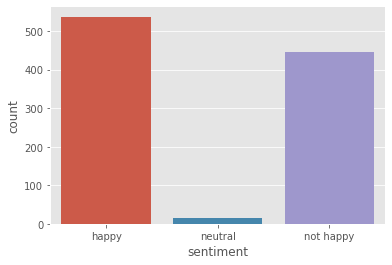

In [91]:
sns.countplot(data=vaders, x='sentiment')
